# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shubarshi
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | tautira
Processing Record 4 of Set 1 | lovozero
Processing Record 5 of Set 1 | melenki
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | dabra
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | lompoc
Processing Record 13 of Set 1 | champerico
Processing Record 14 of Set 1 | crab hill
City not found. Skipping...
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | erzin
Processing Record 18 of Set 1 | saint-augustin
Processing Record 19 of Set 1 | solton
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | iqa

Processing Record 36 of Set 4 | hami
Processing Record 37 of Set 4 | fallon
Processing Record 38 of Set 4 | san rafael
Processing Record 39 of Set 4 | singaraja
Processing Record 40 of Set 4 | daru
Processing Record 41 of Set 4 | broome
Processing Record 42 of Set 4 | naze
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | calama
Processing Record 45 of Set 4 | mergui
City not found. Skipping...
Processing Record 46 of Set 4 | ambilobe
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | kapaa
Processing Record 49 of Set 4 | bubaque
Processing Record 0 of Set 5 | santa maria
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | brae
Processing Record 6 of Set 5 | tefe
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of 

Processing Record 25 of Set 8 | wanganui
Processing Record 26 of Set 8 | kamaishi
Processing Record 27 of Set 8 | barra do corda
Processing Record 28 of Set 8 | dodola
Processing Record 29 of Set 8 | lebu
Processing Record 30 of Set 8 | kahului
Processing Record 31 of Set 8 | muroto
Processing Record 32 of Set 8 | knysna
Processing Record 33 of Set 8 | coolum beach
Processing Record 34 of Set 8 | lagdo
Processing Record 35 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 8 | kushmurun
Processing Record 37 of Set 8 | northam
Processing Record 38 of Set 8 | college
Processing Record 39 of Set 8 | bozoum
Processing Record 40 of Set 8 | marawi
Processing Record 41 of Set 8 | maralal
Processing Record 42 of Set 8 | ilo
Processing Record 43 of Set 8 | zhanaozen
Processing Record 44 of Set 8 | shetpe
Processing Record 45 of Set 8 | tinaquillo
Processing Record 46 of Set 8 | prieska
Processing Record 47 of Set 8 | karratha
Processing Record 48 of Set 8 | filadelfi

Processing Record 12 of Set 12 | gold coast
Processing Record 13 of Set 12 | noyabrsk
Processing Record 14 of Set 12 | zarakes
City not found. Skipping...
Processing Record 15 of Set 12 | faya
Processing Record 16 of Set 12 | panjab
Processing Record 17 of Set 12 | conde
Processing Record 18 of Set 12 | acapulco
Processing Record 19 of Set 12 | coihaique
Processing Record 20 of Set 12 | nador
Processing Record 21 of Set 12 | puerto ayacucho
Processing Record 22 of Set 12 | tangjiazhuang
Processing Record 23 of Set 12 | zhuhai
Processing Record 24 of Set 12 | benghazi
Processing Record 25 of Set 12 | te anau
Processing Record 26 of Set 12 | necochea
Processing Record 27 of Set 12 | buin
Processing Record 28 of Set 12 | kasongo-lunda
Processing Record 29 of Set 12 | ulverstone
Processing Record 30 of Set 12 | luderitz
Processing Record 31 of Set 12 | loubomo
Processing Record 32 of Set 12 | marquette
Processing Record 33 of Set 12 | abha
Processing Record 34 of Set 12 | atbasar
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shubarshi,48.5872,57.1869,-11.68,95,91,4.77,KZ,1675953650
1,bluff,-46.6000,168.3333,8.22,70,100,2.27,NZ,1675953651
2,tautira,-17.7333,-149.1500,26.65,74,87,3.78,PF,1675953653
3,lovozero,68.0050,35.0117,-0.83,86,100,5.40,RU,1675953653
4,melenki,55.3343,41.6295,-3.50,87,98,2.48,RU,1675953653


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shubarshi,48.5872,57.1869,-11.68,95,91,4.77,KZ,1675953650
1,bluff,-46.6000,168.3333,8.22,70,100,2.27,NZ,1675953651
2,tautira,-17.7333,-149.1500,26.65,74,87,3.78,PF,1675953653
3,lovozero,68.0050,35.0117,-0.83,86,100,5.40,RU,1675953653
4,melenki,55.3343,41.6295,-3.50,87,98,2.48,RU,1675953653


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

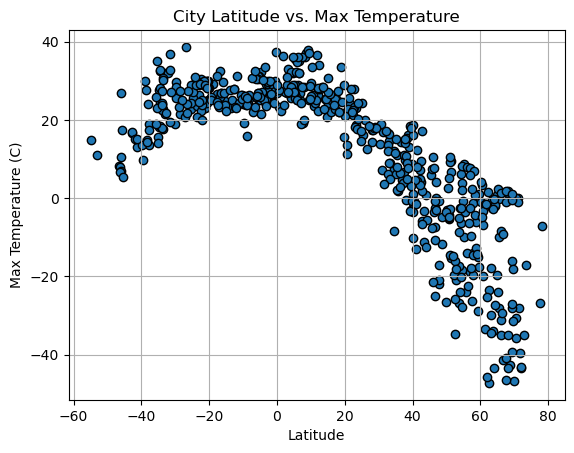

In [9]:
# Build scatter plot for latitude vs. temperature
x_value_lat = city_data_df["Lat"]
y_value_temp = city_data_df["Max Temp"]
plt.scatter(x_value_lat, y_value_temp, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

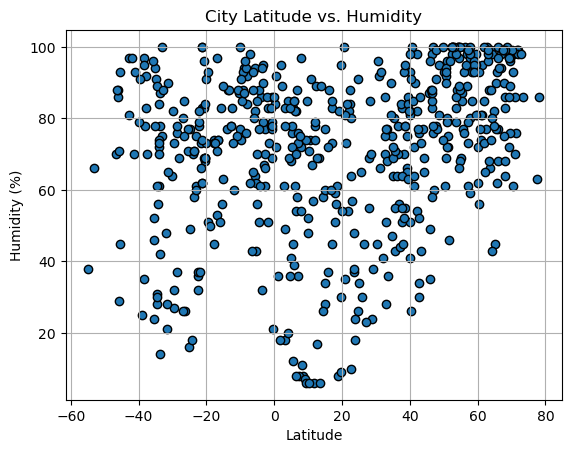

In [10]:
# Build the scatter plots for latitude vs. humidity
x_value_lat = city_data_df["Lat"]
y_value_hmd = city_data_df["Humidity"]
plt.scatter(x_value_lat, y_value_hmd, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

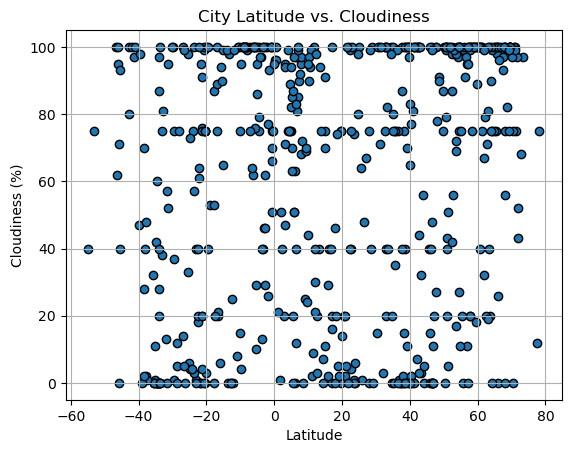

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_value_lat = city_data_df["Lat"]
y_value_cld = city_data_df["Cloudiness"]
plt.scatter(x_value_lat, y_value_cld, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

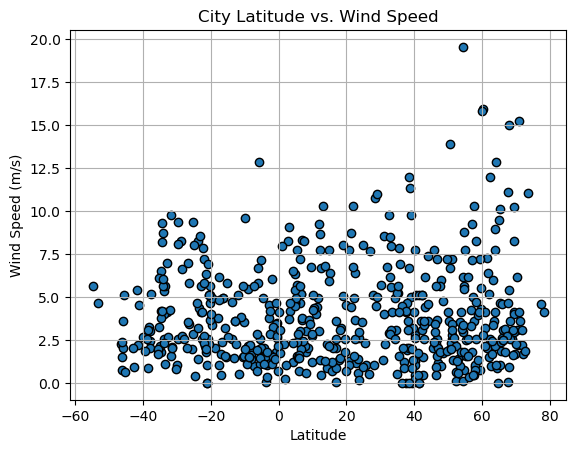

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_value_lat = city_data_df["Lat"]
y_value_wsd = city_data_df["Wind Speed"]
plt.scatter(x_value_lat, y_value_wsd, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shubarshi,48.5872,57.1869,-11.68,95,91,4.77,KZ,1675953650
3,lovozero,68.0050,35.0117,-0.83,86,100,5.40,RU,1675953653
4,melenki,55.3343,41.6295,-3.50,87,98,2.48,RU,1675953653
5,jamestown,42.0970,-79.2353,7.06,98,100,3.60,US,1675953654
7,dabra,25.9000,78.3333,20.08,30,1,1.04,IN,1675953654


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bluff,-46.6000,168.3333,8.22,70,100,2.27,NZ,1675953651
2,tautira,-17.7333,-149.1500,26.65,74,87,3.78,PF,1675953653
6,hithadhoo,-0.6000,73.0833,27.63,69,100,3.50,MV,1675953654
8,mount gambier,-37.8333,140.7667,13.53,92,2,2.42,AU,1675953655
9,ushuaia,-54.8000,-68.3000,14.81,38,40,5.66,AR,1675953639


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8591170351052003


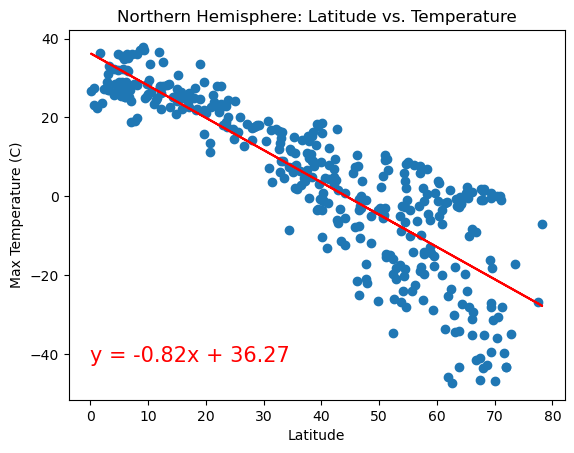

In [35]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Northern Hemisphere: Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(0,-42),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

The r-value is: 0.5215931669667319


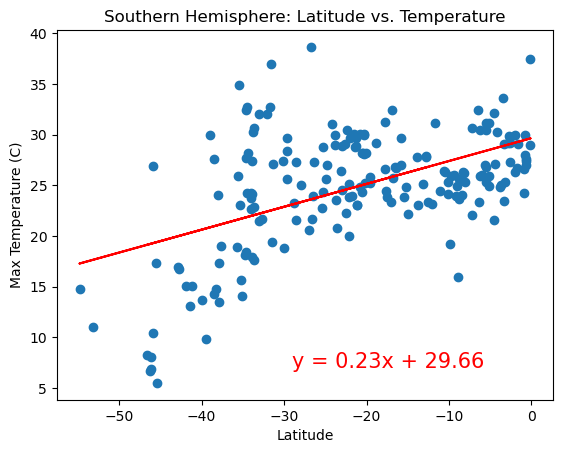

In [36]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Southern Hemisphere: Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-29,7),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.47670091553568217


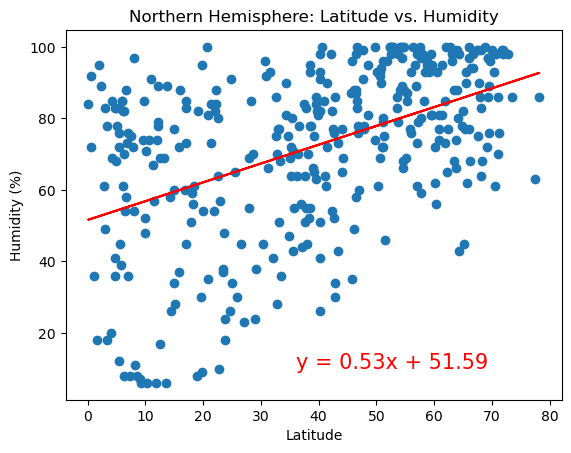

In [37]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(36,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

The r-value is: 0.16477448276444018


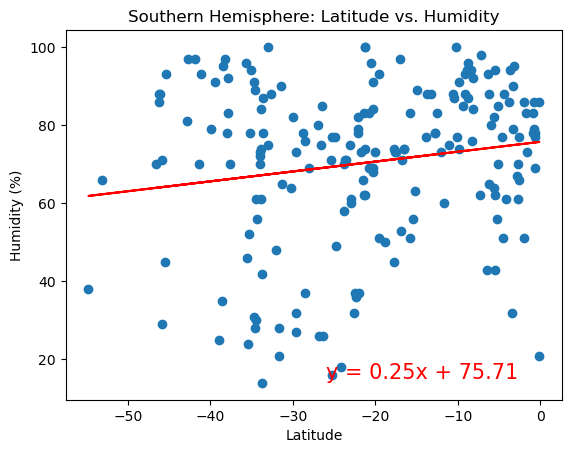

In [38]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-26,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.20389314747836149


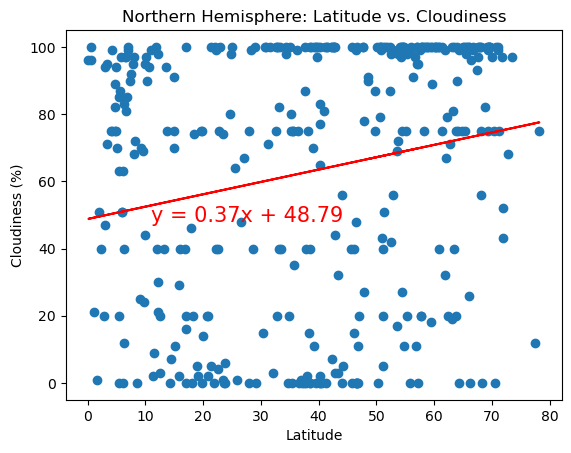

In [39]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(11,48),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

The r-value is: 0.2819433080025858


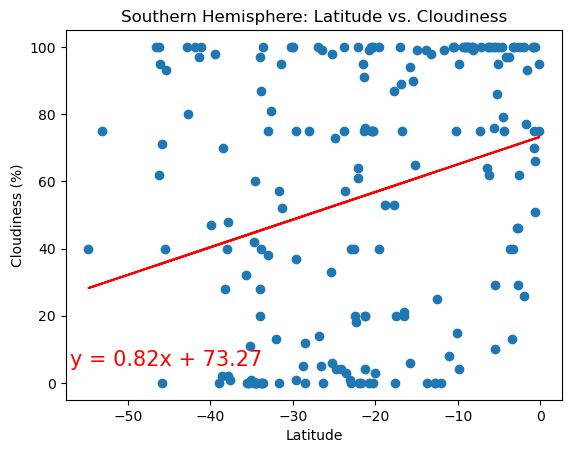

In [40]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-57,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.037387248938408425


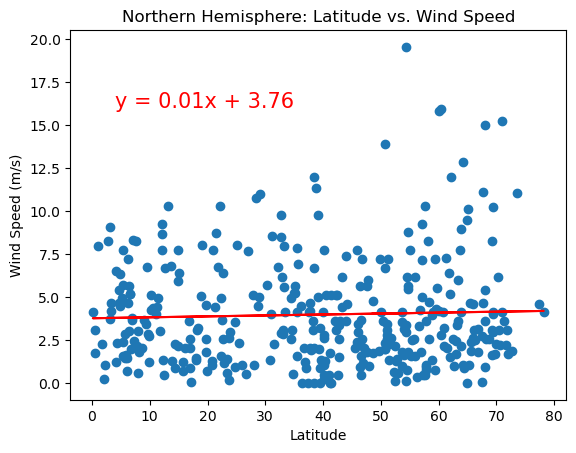

In [41]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(4,16),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

The r-value is: -0.1456875920758539


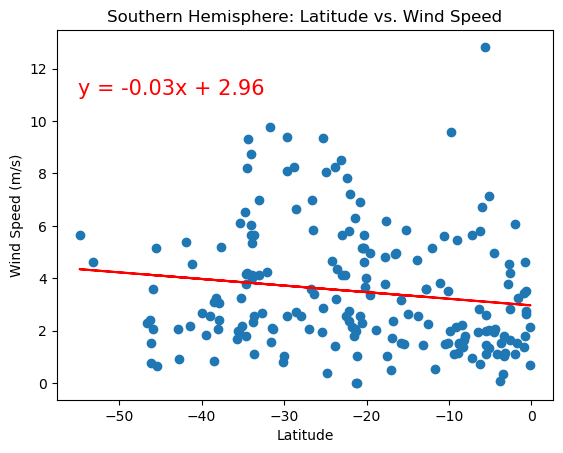

In [42]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 